for now, I have put all the mac ids between 12-6am ,and with the count of 20 in 5 mins, into the whitelist.
I have calculated the probabilites but that didnt seem to tell me much, and then I apploed the grouping algorihtm
The thing is that the grouping algorithm (of 5min slicing) takes care of all the count, and so does the RSSI limit of -70
The whitelist decreased the final count by 16 (211 to 195)

In [1]:
import numpy as np
import json
import pandas as pd
import scipy.stats as sm 
import pylab as pl
import collections
import string
import matplotlib.pyplot as pl
c=json.load(open('pui.json'))
pl.rcParams.update(c)
from IPython.display import HTML
%pylab inline
import sqlite3

Populating the interactive namespace from numpy and matplotlib


C:\Users\PRIYA  SINGH\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Connecting to database using connect
conn = sqlite3.connect('log.db')
#cursor to move through the tables in the database, we have three tables,probes,pircounts and messages
cur = conn.cursor()
#First we will work with probes data
#Generating empty list to store columns for probes data
#There are 5 columns orginally in the probes table but we use only 3 from them,hence creating only 3 lists
dtg_mac = []
mac_mac = []
rssi_mac = []


for row in cur.execute('SELECT * FROM probes;'):
    #print row
    dtg_mac.append(row[0])
    mac_mac.append(row[1])
    rssi_mac.append(row[2])
    #ssid.append(row[3])
    #oui.append(row[4])
    #count.append(row[5])
print 'This is the length of the probes table',len(dtg_mac)        


This is the length of the probes table 116610


In [3]:
d = {'dtg':dtg_mac,'mac':mac_mac,'rssi':rssi_mac}
mac1 = pd.DataFrame(d)
idx = mac1.groupby('mac').count()
idx.index[0]

u'00:02:3a:d8:12:9e'

In [4]:
mac_row = []
for i in range(len(idx)):
    if idx.dtg[i] >= 67 :
        mac_row.append(idx.index[i])

In [5]:
for i in range(len(mac_row)):
    
    mac1 = mac1[mac1.mac != mac_row[i]]

In [6]:
#as we have removed some values,we need to set the index back to right and not with missng values
#if this is not done , the data shows index as 1,3,5,... which is not desired as looping is done on this data further ahead
print len(mac1)
mac1.index = range(len(mac1))
mac1

18080


,dtg,mac,rssi
0,2015-09-15 15:55:00.887204,dc:9b:9c:40:66:7e,-59
1,2015-09-15 15:55:02.819921,74:5c:9f:b1:ac:97,-77
2,2015-09-15 15:55:13.861482,60:af:6d:8d:95:c3,-81
3,2015-09-15 15:55:18.444136,f0:db:f8:eb:70:a0,-77
4,2015-09-15 15:55:29.892055,f8:95:c7:d3:31:cf,-77
5,2015-09-15 15:55:30.445207,0a:8f:16:7f:59:9e,-77
6,2015-09-15 15:55:34.430396,86:bd:23:26:83:2a,-71
7,2015-09-15 15:55:37.610941,c0:ee:fb:5a:15:5c,-79
8,2015-09-15 15:56:00.183202,94:01:c2:31:b4:8c,-81
9,2015-09-15 15:56:01.150591,30:f3:1d:5f:d1:40,-75


In [7]:
mac1['date']=pd.to_datetime(mac1['dtg'])
mac1['hour']=mac1['date'].dt.hour
mac1['minute']=mac1['date'].dt.minute

In [8]:
r_mac1=[]


for i in range(len(mac1)):
    #print 'ji'
    if str(mac1['date'][i])[0:10]=='2015-09-17': 
        r_mac1.append(i)
        
m_mac1 = mac1['hour'][min(r_mac1):max(r_mac1)]
k_mac1 = list (m_mac1)
print len(m_mac1)        

7616


In [9]:
#creating a new dataframe so that we work on only that day from the data
day_9_17_mac1 = mac1[min(r_mac1):max(r_mac1)]
#Keeping all mac addresses above -70, low signal strenght,
#This helps to filter out extraneous data before,without even applying any cleaning algorithm
day_9_17_mac1 = day_9_17_mac1[(day_9_17_mac1['rssi']> -70)]
length = len(day_9_17_mac1)

#Having list of all mac addresses for use 
mac_day = list(day_9_17_mac1['mac'])
print min(r_mac1)

3498


In [10]:
for i in range(len(day_9_17_mac1)):
    if (day_9_17_mac1['rssi'].iloc[i] > -70):
        print i 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [34]:
mac_day_set = set(mac_day)
print len(mac_day_set)

163


In [35]:
mac_hour = list(mac1_hour["mac"])
for m in mac_hour:
     
    if mac_hour.count(m)>25:
        remove_mac.append(m)

In [36]:

row_mac1 = []
remove_mac = []
for k in range(0,24):
    
    #24 hours
    #You can do it for the whole day to see if >-70 would remove them or not 
    row_mac1.append(k_mac1.count(i))
    #Getting hourly data depending on k value
    mac1_hour = mac1[min(r_mac1):max(r_mac1)][mac1['hour'][min(r_mac1):max(r_mac1)] == k]
    mac_hour = list(mac1_hour["mac"])
    for m in mac_hour:
        if mac_hour.count(m)>25:
            remove_mac.append(m)
    #pir1_hour = pir1[min(r_pir1):max(r_pir1)][pir1['hour'][min(r_pir1):max(r_pir1)] == k]
    #print mac1_hour['minute'].head()
    for i in range(12):
        #slicing into 5 minutes, range as 12 value as an hour gets divided into 12 equal 5 minutes
        #this loop counts the number of each mac address occurs in each 5 minute of what hour
        #it also compares with the pir count for that hour - just to see how it varies
        mac1_5minute = []
        #pir1_5minute = []
        mac1_5minute = mac1_hour[(mac1['minute'] >= i*5) & (mac1['minute'] <= (i+1)*5)]
        mac = list((mac1_5minute['mac']).astype(str))
        counter = collections.Counter(mac1_5minute['mac'])
        
        #pir1_5minute = pir1_hour[(pir1['minute'] >= i*5) & (mac1['minute'] <= (i+1)*5)]
        
            
        #print mac1_5minute 
        #counter1 = collections.Counter(pir1_5minute['count'])
        prob = []
        macid = []
        print 'hour',k ,'this is minute',i*5 , 'and mac count in this 5min is',len(counter)
        print ''
        #print counter
        new_dict = dict(counter)
        
        for i in new_dict:
            if new_dict[i]>=20:
                remove_mac.append(i)
            macid.append(i)
            a = float("{0:.2f}".format(new_dict[i]*1.0/len(mac))) #Limiting to two decimal points
            prob.append(a)
            
            
        
        print dict(zip(macid, prob))
        
        
        counter_list = list(counter)
        #print counter_list
        print ''
        if k <=5:
            #counter_list = list(counter)
            remove_mac = remove_mac + counter_list
            
            
    counter = collections.Counter(mac1_hour['mac'])
    
   
    

hour 0 this is minute 0 and mac count in this 5min is 4

{u'84:38:38:6d:52:16': 0.1, u'20:62:74:56:8c:80': 0.4, u'28:5a:eb:04:d5:45': 0.1, u'4c:7c:5f:7f:98:68': 0.4}

hour 0 this is minute 5 and mac count in this 5min is 3

{u'60:51:2c:ea:d4:5e': 0.6, u'28:5a:eb:04:d5:45': 0.2, u'de:16:bd:23:b0:ad': 0.2}

hour 0 this is minute 10 and mac count in this 5min is 3

{u'f4:09:d8:ab:86:f2': 0.33, u'7a:c0:65:a3:61:2c': 0.33, u'de:16:bd:23:b0:ad': 0.33}

hour 0 this is minute 15 and mac count in this 5min is 4

{u'68:a3:c4:e4:86:f9': 0.2, u'd0:92:9e:e3:bc:18': 0.2, u'7a:c0:65:a3:61:2c': 0.1, u'f4:09:d8:ab:86:f2': 0.5}

hour 0 this is minute 20 and mac count in this 5min is 1

{u'f4:09:d8:ab:86:f2': 1.0}

hour 0 this is minute 25 and mac count in this 5min is 4

{u'f4:09:d8:b4:c0:b5': 0.25, u'a0:39:f7:11:f0:e1': 0.25, u'3c:cb:7c:00:aa:f1': 0.25, u'e8:50:8b:54:78:0d': 0.25}

hour 0 this is minute 30 and mac count in this 5min is 1

{u'a0:39:f7:11:f0:e1': 1.0}

hour 0 this is minute 35 and mac co

In [37]:
whitelist = set(remove_mac)

In [38]:
print len(whitelist)
print len(remove_mac)

103
730


In [39]:
print len(mac_day_set)
whitelist = list(whitelist)

163


In [40]:
for i in range(len(whitelist)):
    day_9_17_mac1 = day_9_17_mac1[day_9_17_mac1['mac']!=whitelist[i]]

In [41]:
len(day_9_17_mac1)

192

In [42]:
mac_set = set(day_9_17_mac1['mac'])
mac_set = list(mac_set)
print len(mac_set)
print type(mac_set)
#generation a zeroes list to store count for mac address
count_mac = [0]*len(mac_set)

150
<type 'list'>


In [43]:
len(day_9_17_mac1)

192

In [24]:
print len(day_9_17_mac1)
day_9_17_mac1['index'] = range(len(day_9_17_mac1))

590


In [25]:
mac_day_set = set(mac_day)
print len(mac_day_set)

163


In [26]:
day_9_17_mac1.head()

,dtg,mac,rssi,date,hour,minute,index
3823,2015-09-17 06:53:27.728491,e2:76:5c:82:77:91,-65,2015-09-17 06:53:27.728491,6,53,0
3895,2015-09-17 07:11:09.430862,42:9d:73:db:c1:d1,-69,2015-09-17 07:11:09.430862,7,11,1
3896,2015-09-17 07:11:09.761108,42:9d:73:db:c1:d1,-67,2015-09-17 07:11:09.761108,7,11,2
3901,2015-09-17 07:11:54.481708,42:9d:73:db:c1:d1,-69,2015-09-17 07:11:54.481708,7,11,3
3932,2015-09-17 07:19:20.037453,be:7b:5b:0d:20:ba,-67,2015-09-17 07:19:20.037453,7,19,4


In [27]:
for j in range(len(mac_set)):
    #print j 
    dataframe_permac = day_9_17_mac1[['mac','index']][day_9_17_mac1['mac'] == mac_set[j]]
    #working with lists , on hourly occurrence of an individual mac address
    l_hour = day_9_17_mac1['hour'][day_9_17_mac1['mac'] == mac_set[j]]
    l_minute = day_9_17_mac1['minute'][day_9_17_mac1['mac'] == mac_set[j]]
    l_hour = list (l_hour)
    l_minute = list (l_minute)
    
    occ = len(dataframe_permac)
    #print occ,'occ' , was just wile testing 
    occ1 = occ - 1
    #print occ1,'occ1'
    if occ!= 1 :
        #print 'occ loop'
        for i in range(occ):
            #print 'for loop'
            if (i != occ1):
                #we need to check for mac addresses occurring in an hour
                #see if they are consecutive in minutes-if yes- group them as one
                #i.e. remove all but one,but we check through all the minutes,
                #hence the minute segregation at the start of this ipynb comes handy 
                #print 'for occ1'
                if (l_hour[i] == l_hour[i+1]):
                    #print 'T in hour'
                    #print dataframe_permac['mac']
                    if (l_minute[i] == l_minute[i+1]):
                        #print 't in 1min'
                        day_9_17_mac1 = day_9_17_mac1 [day_9_17_mac1['index']!=(dataframe_permac['index'].iloc[i+1]) ]
                    elif (int(l_minute[i+1] - l_minute[i]) < 15) :
                        #print i 
                        #from the data that I had observed on printing, mac addresses usually grouped around 10-15 minutes 
                        #for an hour ,and would be present in different hours
                        #this might be because we had cleaned the dataset above >-70
                        #we can experiment with the numbers
                        day_9_17_mac1 = day_9_17_mac1[day_9_17_mac1['index'] != (dataframe_permac['index'].iloc[i+1]) ]





In [28]:
#day_9_17_mac1[day_9_17_mac1['mac'] == mac_set[112] ]
print len(day_9_17_mac1)
#Checking reduced length again
#Just to keep a track, we had started with 18080, then dropped ot 858(after removeing >-70), and now 219.

192


In [44]:
len(set(day_9_17_mac1['mac']))

150

In [30]:
#plotting between 6am to 12 pm
hour_mac_final = list(day_9_17_mac1['hour'])

k = []
for i in range (6,23):
    k.append(hour_mac_final.count(i))
print (k)    

[1, 2, 5, 6, 15, 19, 30, 16, 28, 18, 13, 18, 5, 8, 6, 1, 1]


In [31]:
l=range(6,24)
print l

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


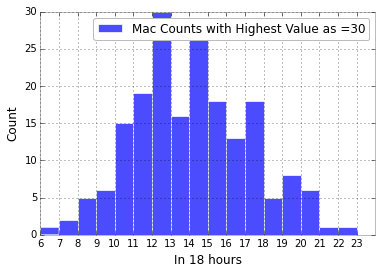

In [32]:
fig, ax = plt.subplots(1, 1)
ax.hist(hour_mac_final,l,color='b',alpha=0.7,label='Mac Counts with Highest Value as =%i'%max(k))
ax.set_xlabel('In 18 hours')
ax.set_ylabel('Count')
xticks(range(6,24)) 
#yticks(range(0,32,1))
#ax.hist(k_pir1 ,l,color='g',alpha=0.7,label='Pir Counts with Highest Value as =%i'%max(k_pir1))
ax.set_ylim
pl.grid(True)
ax.legend()
pl.show()